<a href="https://colab.research.google.com/github/montali/LastDuel/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost keras_tuner

In [2]:
import catboost
import pandas as pd

In [3]:
performances = pd.read_csv("data_for_task.csv", index_col=0).dropna(axis=0)
performances

,id,average_ensemble,average_mlp,ensemble_mlp_diffn,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
0,1,0.958916,0.928211,0.030705,0.606466,0.981204,0.023385,0.941800,0.981204,0.023385,...,0.967172,0.022272,0.943873,0.967172,0.022272,0.943873,1.502523,0.948265,0.030067,0.922629
1,2,0.907264,0.967613,-0.060349,0.606466,0.906774,0.132517,0.619102,0.906774,0.132517,...,0.929700,0.080178,0.795325,0.929700,0.080178,0.795325,1.557606,0.872195,0.063474,0.826110
2,3,0.978562,0.954068,0.024494,0.999061,0.961912,0.059136,0.881192,0.961912,0.059136,...,0.945136,0.054443,0.890850,0.945136,0.054443,0.890850,0.164399,0.972843,0.069149,0.860968
6,9,0.681645,0.757492,-0.075847,0.632353,0.842862,0.360976,0.526012,0.842862,0.360976,...,0.842526,0.268293,0.651436,0.842526,0.268293,0.651436,5.796551,0.825862,0.258537,0.666329
7,10,0.816988,0.814189,0.002799,0.503401,0.792455,0.236486,0.547440,0.792455,0.236486,...,0.757621,0.243243,0.529536,0.757621,0.243243,0.529536,1.591645,0.827738,0.195946,0.623707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19495,3970,0.935556,0.600500,0.335056,0.923695,0.920187,0.080000,0.840051,0.920187,0.080000,...,0.803827,0.196000,0.607849,0.803827,0.196000,0.607849,0.000000,0.924027,0.076000,0.848000
19496,3971,0.963784,0.672866,0.290919,0.965138,0.948709,0.043956,0.912011,0.948709,0.043956,...,0.907168,0.091575,0.816048,0.907168,0.091575,0.816048,0.000000,0.977797,0.021978,0.955929
19497,3972,0.928707,0.923355,0.005352,0.987694,0.711715,0.089968,0.374492,0.711715,0.089968,...,0.609461,0.115858,0.218120,0.609461,0.115858,0.218120,0.000000,0.762965,0.086731,0.470942
19498,3973,0.947878,0.948580,-0.000702,0.987694,0.618161,0.056958,0.332928,0.618161,0.056958,...,0.515800,0.089968,0.032195,0.515800,0.089968,0.032195,0.000000,0.661059,0.082201,0.271099


In [4]:
X = performances.drop(["average_ensemble", "average_mlp", "ensemble_mlp_diffn", "id"], axis=1)
y = performances["ensemble_mlp_diffn"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

X_train

,AutoCorrelation,CfsSubsetEval_DecisionStumpAUC,CfsSubsetEval_DecisionStumpErrRate,CfsSubsetEval_DecisionStumpKappa,CfsSubsetEval_NaiveBayesAUC,CfsSubsetEval_NaiveBayesErrRate,CfsSubsetEval_NaiveBayesKappa,CfsSubsetEval_kNN1NAUC,CfsSubsetEval_kNN1NErrRate,CfsSubsetEval_kNN1NKappa,...,RandomTreeDepth2AUC,RandomTreeDepth2ErrRate,RandomTreeDepth2Kappa,RandomTreeDepth3AUC,RandomTreeDepth3ErrRate,RandomTreeDepth3Kappa,StdvNominalAttDistinctValues,kNN1NAUC,kNN1NErrRate,kNN1NKappa
5067,0.968992,0.692493,0.553846,0.307692,0.692493,0.553846,0.307692,0.692493,0.553846,0.307692,...,0.375185,0.992308,-0.240385,0.375185,0.992308,-0.240385,14.849242,0.389423,0.976923,-0.221154
12656,0.999947,0.857292,0.176972,0.591414,0.857292,0.176972,0.591414,0.857292,0.176972,0.591414,...,0.789463,0.191062,0.580117,0.789463,0.191062,0.580117,0.000000,0.772223,0.196740,0.557752
5617,0.505051,0.675833,0.340000,0.273504,0.675833,0.340000,0.273504,0.675833,0.340000,0.273504,...,0.695833,0.290000,0.393305,0.695833,0.290000,0.393305,0.000000,0.575000,0.400000,0.152542
15948,0.885932,0.938893,0.056818,0.878587,0.938893,0.056818,0.878587,0.938893,0.056818,0.878587,...,0.935856,0.060606,0.871712,0.935856,0.060606,0.871712,7.071068,0.939470,0.060606,0.870739
15507,0.954315,0.498917,0.084531,0.000000,0.498917,0.084531,0.000000,0.498917,0.084531,0.000000,...,0.644801,0.140321,0.181976,0.644801,0.140321,0.181976,0.000000,0.629184,0.128487,0.158944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11332,0.987694,0.857282,0.069903,0.794653,0.857282,0.069903,0.794653,0.857282,0.069903,0.794653,...,0.801187,0.133333,0.609965,0.801187,0.133333,0.609965,0.000000,0.891914,0.082201,0.765213
12014,0.476190,0.587104,0.418605,0.087264,0.587104,0.418605,0.087264,0.587104,0.418605,0.087264,...,0.591629,0.395349,0.181411,0.591629,0.395349,0.181411,0.000000,0.469457,0.441860,0.066286
5431,0.505051,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,0.698990,0.340000,0.326733,...,0.656566,0.340000,0.313131,0.656566,0.340000,0.313131,0.000000,0.571717,0.420000,0.144603
889,0.393197,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,0.823949,0.418478,0.463731,...,0.721951,0.476902,0.391513,0.721951,0.476902,0.391513,7.659417,0.701815,0.466033,0.402286


In [7]:
model = catboost.CatBoostRegressor()
model.fit(X_train, y_train, verbose=0)
print(f"\n\nCatBoost obtained an R2 score of {model.score(X_test, y_test)}")



CatBoost obtained an R2 score of 0.8226455463945954


<AxesSubplot:xlabel='feature'>

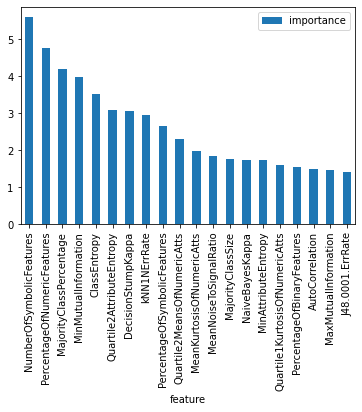

In [8]:
pd.DataFrame(zip(X_train.columns,model.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=False).iloc[:20].plot.bar(x="feature", y="importance")

In [9]:

import tensorflow as tf
from tensorflow import keras

normalizer = keras.layers.Normalization(axis=-1, name='normalizer')
normalizer.adapt(X_train)

2022-03-23 10:51:50.691527: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam", )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalizer (Normalization)  (None, 107)               215       
                                                                 
 dense (Dense)               (None, 128)               13824     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [11]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0426 - val_loss: 0.0140
Epoch 2/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0178 - val_loss: 0.0058
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0060
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 7/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 8/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 9/50
249/249 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 10/50
249/249 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0033

In [12]:
!pip install tensorflow-addons

In [14]:
import keras_tuner as kt
import tensorflow_addons as tfa


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(normalizer)
    for n_layer in range(hp.Int('n_layers', 1, 6, default=2)):
        model.add(keras.layers.Dense(hp.Int('n_units_'+str(n_layer), 1, 512), activation=hp.Choice('activation', ['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_'+str(n_layer), 0, 0.5, step=0.05)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.RSquare(dtype=tf.float32, y_shape=(1,))])
    return model

tuner = kt.Hyperband(build_model,
                        objective=kt.Objective("r_square", "max"),
                        max_epochs=100,
                        directory='/tmp/keras_tuner',
                        project_name='lastduel',
                        overwrite=True)
tuner.search(X_train,
             y_train,
             epochs=10,
             validation_split=0.2,
             callbacks=[tf.keras.callbacks.TensorBoard("/tmp/tb_logs")])


Trial 102 Complete [00h 00m 03s]
r_square: 0.068386971950531

Best r_square So Far: 0.30177074670791626
Total elapsed time: 00h 07m 21s

Search: Running Trial #103

Hyperparameter    |Value             |Best Value So Far 
n_layers          |3                 |5                 
n_units_0         |55                |76                
activation        |relu              |relu              
dropout_0         |0.15              |0                 
n_units_1         |307               |118               
dropout_1         |0.35              |0.2               
n_units_2         |14                |451               
dropout_2         |0.15              |0.35              
n_units_3         |368               |248               
dropout_3         |0.05              |0.25              
n_units_4         |311               |100               
dropout_4         |0.45              |0.2               
n_units_5         |17                |447               
dropout_5         |0.35              

KeyboardInterrupt: 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
from google.colab import files

best_model.save('best_model_h5', save_format='h5')
files.download('best_model_h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, best_model.predict(X_test)), r2_score(y_test, best_model.predict(X_test))

(0.00385789323120996, 0.6142371867666576)